In [71]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

train_dir = os.path.join('chest_xray/train/')
eval_dir = os.path.join('chest_xray/test/')

In [72]:
ACCURACY_THRESHOLD = 0.95

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if (logs.get('val_accuracy')> 0.85 and logs.get('val_accuracy') < 1):
            print("\nReached desired accuracy, so stopping training!!")
            self.model.stop_training = True
callbacks = myCallback()

In [73]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
batch_size = 30


# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255
                                   ,zoom_range = [0.9,1.1]
                                   ,width_shift_range=0.1
                                   ,height_shift_range=0.1
                                   ,horizontal_flip = True
                                   ,fill_mode='constant')

train_generator = train_datagen.flow_from_directory(
  train_dir,
  batch_size = batch_size ,
  target_size=(150, 150),
  class_mode='binary'
)

Found 10448 images belonging to 2 classes.


In [74]:
# All images will be rescaled by 1./255
eval_datagen = ImageDataGenerator(rescale=1./255)

eval_generator = eval_datagen.flow_from_directory(
  eval_dir,
  batch_size = batch_size ,
  target_size=(150, 150),
  class_mode='binary'
)

Found 1248 images belonging to 2 classes.


In [75]:
'''
img = load_img ('chest_xray/train/PNEUMONIA/person423_bacteria_1855.jpeg')
x = img_to_array(img)
x = x.reshape((1,)+x.shape)
i = 0
for batch in train_datagen.flow(x,batch_size=1,
                         save_to_dir='augmented',save_prefix='aug',save_format="jpeg"):
    i +=1
    if i > 20:
        break
'''

'\nimg = load_img (\'chest_xray/train/PNEUMONIA/person423_bacteria_1855.jpeg\')\nx = img_to_array(img)\nx = x.reshape((1,)+x.shape)\ni = 0\nfor batch in train_datagen.flow(x,batch_size=1,\n                         save_to_dir=\'augmented\',save_prefix=\'aug\',save_format="jpeg"):\n    i +=1\n    if i > 20:\n        break\n'

In [76]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (4,4), activation='relu', input_shape=(150, 150, 3)),
    #tf.keras.layers.MaxPooling2D(3, 3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    #tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Conv2D(64, (4,4), activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
 
    
    
    tf.keras.layers.Conv2D(64, (4,4), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    
    tf.keras.layers.Conv2D(128, (4,4), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(256, (4,4), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
   
    #
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    #tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [77]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 147, 147, 32)      1568      
                                                                 
 batch_normalization_20 (Bat  (None, 147, 147, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 70, 70, 64)        32832     
                                                                 
 dropout_21 (Dropout)        (None, 70, 70, 64)        0         
                                                                 
 batch_normalization_21 (Bat  (None, 70, 70, 64)      

In [78]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [79]:

history = model.fit_generator(
      train_generator,
      steps_per_epoch=10448//batch_size ,     
      epochs=10,
      validation_data=eval_generator,
      validation_steps= 1248//batch_size ,
      verbose=1,
      #callbacks=[callbacks]
)

/var/folders/k3/gcflkw4j1lx_kn_v5p132mym0000gn/T/ipykernel_27432/4175772893.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10


2022-05-20 15:45:49.441281: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


348/348 [==============================] - ETA: 0s - loss: 0.2597 - accuracy: 0.8967

2022-05-20 15:47:11.515799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


348/348 [==============================] - 89s 245ms/step - loss: 0.2597 - accuracy: 0.8967 - val_loss: 4.8539 - val_accuracy: 0.6252
Epoch 2/10
348/348 [==============================] - 83s 239ms/step - loss: 0.1593 - accuracy: 0.9411 - val_loss: 0.3038 - val_accuracy: 0.8675
Epoch 3/10
348/348 [==============================] - 83s 240ms/step - loss: 0.1327 - accuracy: 0.9519 - val_loss: 0.3250 - val_accuracy: 0.8724
Epoch 4/10
348/348 [==============================] - 83s 239ms/step - loss: 0.1183 - accuracy: 0.9564 - val_loss: 0.3341 - val_accuracy: 0.8455
Epoch 5/10
348/348 [==============================] - 83s 239ms/step - loss: 0.1090 - accuracy: 0.9609 - val_loss: 0.4059 - val_accuracy: 0.8081
Epoch 6/10
348/348 [==============================] - 84s 241ms/step - loss: 0.1044 - accuracy: 0.9625 - val_loss: 0.4352 - val_accuracy: 0.8146
Epoch 7/10
348/348 [==============================] - 83s 239ms/step - loss: 0.0960 - accuracy: 0.9644 - val_loss: 0.3039 - val_accuracy: 0.8

In [80]:
from keras.preprocessing import image



img =  image.load_img('chest_xray/train/NORMAL/NORMAL2-IM-0840-0001.jpeg',target_size=(150,150))
#Chest_eval/infected2.jpeg
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)


images = np.vstack([x])
classes = model.predict(images,batch_size=10)

print (classes)



2022-05-20 15:59:48.862201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[[1.]]


In [81]:
from keras.preprocessing import image



img =  image.load_img('chest_xray/train/PNEUMONIA/person508_bacteria_2144.jpeg',target_size=(150,150))

x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)


images = np.vstack([x])
classes = model.predict(images,batch_size=10)

print (classes)



[[1.]]


In [82]:
test_acc = model.evaluate(eval_generator,verbose=1)

print("Loss of the model is - " ,test_acc[0])
print("Accuracy of the model is - " ,test_acc[1]*100 , "%")

42/42 [==============================] - 6s 146ms/step - loss: 0.3004 - accuracy: 0.9127
Loss of the model is -  0.30044543743133545
Accuracy of the model is -  91.26602411270142 %


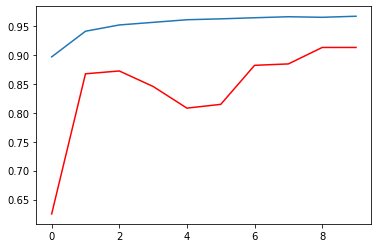

In [88]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'r')

plt.show()

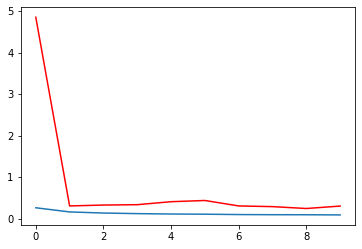

In [89]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'r')
plt.show()
